In [1]:
using Turing
using LimberJack
using LinearAlgebra
using CSV
using NPZ
using FITSIO
using ForwardDiff
using PythonCall
using BenchmarkTools;

    CondaPkg Found dependencies: /home/jaime/.julia/environments/v1.7/CondaPkg.toml
    CondaPkg Found dependencies: /home/jaime/.julia/packages/PythonCall/DqZCE/CondaPkg.toml
    CondaPkg Resolving changes
             + libstdcxx-ng
             + python
    CondaPkg Installing packages


  Package              Version  Build               Channel                    Size
─────────────────────────────────────────────────────────────────────────────────────
  Install:
─────────────────────────────────────────────────────────────────────────────────────

  + lz4-c                1.9.3  h9c3ff4c_1          conda-forge/linux-64     Cached
  + olefile               0.46  pyh9f0ad1d_1        conda-forge/noarch       Cached
  + sqlite              3.39.4  h4ff8645_0          conda-forge/linux-64     Cached
  + unicodedata2        15.0.0  py39hb9d737c_0      conda-forge/linux-64     Cached
  + zlib                1.2.13  h166bdaf_4          conda-forge/linux-64     Cached

  Change:
─────────────────────────────────────────────────────────────────────────────────────

  - camb                 1.3.6  py311h9e0c992_1     conda-forge              Cached
  + camb                 1.3.6  py39hea1df8f_1      conda-forge/linux-64     Cached
  - fftw                3.3.10  nompi_hf0379b8

In [46]:
np = pyimport("numpy")

fol = "LSST"
data_set = "gcgc_Nzs_40"
meta = np.load(string("../data/", fol, "/", data_set, "_meta.npz"))
files = npzread(string("../data/", fol, "/", data_set, "_files.npz"))

tracers_names = pyconvert(Vector{String}, meta["tracers"])
pairs = pyconvert(Vector{Vector{String}}, meta["pairs"]);
idx = pyconvert(Vector{Int}, meta["idx"])
data_vector = pyconvert(Vector{Float64}, meta["cls"])
cov_tot = pyconvert(Matrix{Float64}, meta["cov"])
inv_cov_tot = pyconvert(Matrix{Float64}, meta["inv_cov"])
#cov_tot = npzread("../data/DESY1/binned_40_nzs/gcgc_cov_marg_lsst.npz")["cov_marg"]

43×43 Matrix{Float64}:
  6.43202e11    0.00152534   -7.41916e-6   …  0.0         0.0
  0.00152534    5.5622e12    -0.00899456      0.0         0.0
 -7.41916e-6   -0.00899456    2.7408e13       0.0         0.0
 -0.000493847  -0.00757089   -0.167769        0.0         0.0
  7.51547e-17   0.146811     -0.107398        0.0         0.0
  6.67218e-18   0.060681      0.743446     …  0.0         0.0
 -8.09443e-18   0.00862759   -0.0105328       0.0         0.0
 -1.08732e12   -0.00473071    0.000216991     0.0         0.0
 -0.00171321   -6.96281e12    0.0192617       0.0         0.0
  9.18449e-5    0.0132688    -3.22612e13      0.0         0.0
  0.000495941   0.0113282     0.253887     …  0.0         0.0
 -7.64877e-17  -0.151285      0.111198        0.0         0.0
 -1.77086e-17  -0.0623066    -1.15419         0.0         0.0
  ⋮                                        ⋱              
 -7.44682e-7    0.0021592    -2.06377e12      0.0         0.0
  2.99866e-5    0.000613361   0.0165683       0.0 

In [5]:
#                Omega_b,           Omega_c          n_s,                 h,
#                DESgc__0_gc_b,     DESgc__1_gc_b,   DESgc__2_gc_b,    DESgc__3_gc_b,    DESgc__4_gc_b,
#                DESgc__0_dz,      DESgc__1_dz,      DESgc__2_dz,      DESgc__3_dz,      DESgc__4_dz,
#                wl_ia_A,          wl_ia_eta, 
#                DESwl__0_wl_m,    DESwl__1_wl_m,    DESwl__2_wl_m,    DESwl__3_wl_m,
#                DESwl__0_dz,      DESwl__1_dz,      DESwl__2_dz,      DESwl__3_dz,
#                sigma_8,          Omega_m
carlos_params1 = [4.426868e-02,     2.093138e-01,     8.963611e-01,     8.495440e-01,
                 1.343888e+00,    1.639047e+00,      1.597174e+00,     1.944583e+00,     2.007245e+00,
                -4.679383e-03,   -2.839996e-03,      1.771571e-03,     1.197051e-03,    -5.199799e-03,
                 2.389208e-01,   -6.435288e-01, 
                 1.802722e-03,   -5.508994e-03,     1.952514e-02,    -1.117726e-03,
                -1.744083e-02,    6.777779e-03,    -1.097939e-03,    -4.912315e-03,
                 8.536883e-01,    2.535825e-01];

In [6]:
cls_carlos = npzread("/home/jaime/PhD/LimberJack.jl/chains/carlos_chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info.npz");
cls_carlos2 = npzread("/home/jaime/PhD/LimberJack.jl/chains/carlos_chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info_nointerp.npz");
cls_carlos3 = npzread("/home/jaime/PhD/LimberJack.jl/chains/carlos_chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info_nointerp_EH.npz");
cls_carlos4 = npzread("/home/jaime/PhD/LimberJack.jl/chains/carlos_chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info_nointerp_EH_noconv.npz");

In [7]:
pars = carlos_params1
nuisances = Dict("DESgc__0_0_b" => pars[5],
                 "DESgc__1_0_b" => pars[6],
                 "DESgc__2_0_b" => pars[7],
                 "DESgc__3_0_b" => pars[8],
                 "DESgc__4_0_b" => pars[9],
                 "DESgc__0_0_dz" => pars[10],
                 "DESgc__1_0_dz" => pars[11],
                 "DESgc__2_0_dz" => pars[12],
                 "DESgc__3_0_dz" => pars[13],
                 "DESgc__4_0_dz" => pars[14],

                 "A_IA" => pars[15],
                 "alpha_IA" => pars[16],

                 "DESwl__0_e_dz" => pars[21],
                 "DESwl__1_e_dz" => pars[22],
                 "DESwl__2_e_dz" => pars[23],
                 "DESwl__3_e_dz" => pars[24],
                 "DESwl__0_e_m" => pars[17],
                 "DESwl__1_e_m" => pars[18],
                 "DESwl__2_e_m" => pars[19],
                 "DESwl__3_e_m" => pars[20])

Dict{String, Float64} with 20 entries:
  "DESwl__2_e_dz" => -0.00109794
  "DESwl__3_e_m"  => -0.00111773
  "A_IA"          => 0.238921
  "DESwl__0_e_m"  => 0.00180272
  "DESwl__3_e_dz" => -0.00491232
  "DESgc__3_0_dz" => 0.00119705
  "DESgc__1_0_b"  => 1.63905
  "DESgc__2_0_b"  => 1.59717
  "DESwl__1_e_dz" => 0.00677778
  "DESwl__1_e_m"  => -0.00550899
  "DESgc__4_0_dz" => -0.0051998
  "DESgc__3_0_b"  => 1.94458
  "DESwl__2_e_m"  => 0.0195251
  "DESgc__1_0_dz" => -0.00284
  "DESgc__0_0_dz" => -0.00467938
  "DESgc__4_0_b"  => 2.00725
  "alpha_IA"      => -0.643529
  "DESgc__0_0_b"  => 1.34389
  "DESwl__0_e_dz" => -0.0174408
  "DESgc__2_0_dz" => 0.00177157

In [8]:
cosmology = Cosmology()

Cosmology(Settings(Float64, 200, 100, 200, "BBKS", "linear", nothing), CosmoPar{Real}(0.3, 0.045, 0.67, 0.96, 0.81, 1.0092592592592593, 9.312755027430078e-5, 0.6999068724497256), [0.00010000000000000009, 0.00010718913192051286, 0.000114895100018731, 0.00012315506032928268, 0.00013200884008314189, 0.0001414991297434577, 0.0001516716888470924, 0.00016257556664437954, 0.00017426333860096513, 0.00018679135990207836  …  53.53566677410726, 57.38441648302398, 61.509857885805054, 65.93188271333551, 70.67181273927496, 75.75250258771918, 81.19844993184016, 87.03591361485167, 93.29304026284689, 100.00000000000004], [2175.70697570492, 2324.9422120440977, 2484.355963113363, 2654.6335428721654, 2836.504994775165, 3030.747777825331, 3238.1895728642107, 3459.7112063897994, 3696.2496870747873, 3948.801347567507  …  0.00217225804151763, 0.0017936270900247955, 0.00148071429946577, 0.0012221662782554413, 0.0010085808711105134, 0.0008321737558057696, 0.0006865016358021466, 0.0005662324927377197, 0.00046695

In [83]:
function make_cls(b1, b2, b3, b4; mode="EisHu", nuisances = nuisances)

    s8 = 0.81
    h = 0.6736
    Ωb = 0.02237/h^2
    Ωm = (0.02237+0.12)/h^2
    ns = 0.9649
    DESgc__0_0_b = b1 #~ Uniform(0.8, 3.0) # = 1.21
    DESgc__1_0_b = b2 #~ Uniform(0.8, 3.0) # = 1.30
    DESgc__2_0_b = b3 #~ Uniform(0.8, 3.0) # = 1.48
    DESgc__3_0_b = b4 #~ Uniform(0.8, 3.0) # = 1.64


    nuisances = Dict("DESgc__0_0_b" => DESgc__0_0_b,
                     "DESgc__1_0_b" => DESgc__1_0_b,
                     "DESgc__2_0_b" => DESgc__2_0_b,
                     "DESgc__3_0_b" => DESgc__3_0_b)
    cosmology = LimberJack.Cosmology(Ωm, Ωb, h, ns, s8, 
                                     tk_mode=mode, Pk_mode="Halofit", 
                                     nk=200, nz=200, nz_pk=100)

    return Theory(cosmology, tracers_names, 
                  pairs, idx, files;
                  Nuisances=nuisances)

end

make_cls (generic function with 3 methods)

In [88]:
cls = [make_cls(rand(Uniform(0.8, 2.0)), rand(Uniform(0.8, 2.0)), 
                rand(Uniform(0.8, 2.0)), rand(Uniform(0.8, 2.0))) for i in 1:1000];

In [89]:
cls_m = mean(cls)
cls_s = std(cls)
npzwrite("jaime_cls.npz", Dict("cls_best" => make_cls(1.21, 1.30, 1.48, 1.64),
                               "cls_m" => cls_m,
                               "cls_s" => cls_s))

## plot lkl

In [59]:
#using Plots
function make_Xi(Ωm, s8; pars=pars, mode="EisHu", nuisances=nuisances)
    Ωb = pars[1]
    h = pars[4]
    ns = pars[3]
    DESgc__0_0_b = 1.21 #~ Uniform(0.8, 3.0) # = 1.21
    DESgc__1_0_b = 1.30 #~ Uniform(0.8, 3.0) # = 1.30
    DESgc__2_0_b = 1.48 #~ Uniform(0.8, 3.0) # = 1.48
    DESgc__3_0_b = 1.64 #~ Uniform(0.8, 3.0) # = 1.64


    nuisances = Dict("DESgc__0_0_b" => DESgc__0_0_b,
                     "DESgc__1_0_b" => DESgc__1_0_b,
                     "DESgc__2_0_b" => DESgc__2_0_b,
                     "DESgc__3_0_b" => DESgc__3_0_b)
    cosmology = LimberJack.Cosmology(Ωm, Ωb, h, ns, s8, 
                                     tk_mode=mode, Pk_mode="Halofit")

    theory = Theory(cosmology, tracers_names, pairs,
                    idx, files;
                    Nuisances=nuisances)
    return dot((theory .- data_vector), inv_cov_tot  * (theory .- data_vector))
end

make_Xi (generic function with 1 method)

In [65]:
Ωms = LinRange(0.1, 0.6, 30)
s8s = LinRange(0.6, 0.9, 30)

100-element LinRange{Float64, Int64}:
 0.6,0.60303,0.606061,0.609091,0.612121,…,0.890909,0.893939,0.89697,0.9

In [66]:
Xi2s_emul = zeros(length(Ωms), length(s8s))
for i in 1:length(Ωms)
    for j in 1:length(s8s)
        Xi2s_emul[i, j] = make_Xi(Ωms[i], s8s[j])
    end
end

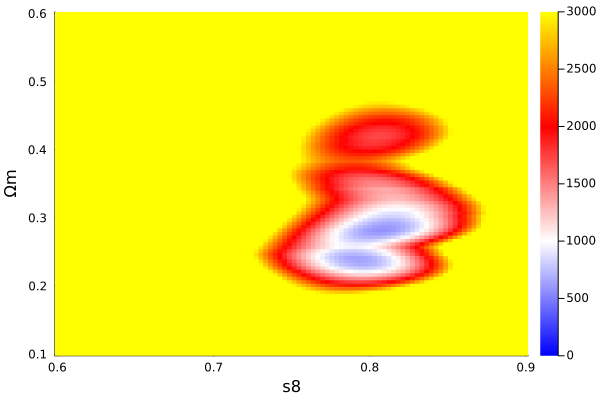

In [71]:
using Plots
gr()
heatmap(s8s, Ωms, Xi2s_emul,
    c=cgrad([:blue, :white,:red, :yellow]),
    ylabel="Ωm", xlabel="s8", clim=(0, 3000))

## tests

In [13]:
function diff_cls(Wb)
    cosmology = LimberJack.Cosmology(0.3, Wb, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu", Pk_mode="Halofit")
    cls = Theory(cosmology, files)
    return cls
end

function numd_cls(Wb)
    cosmology1 = LimberJack.Cosmology(0.3, Wb, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu", Pk_mode="Halofit")
    cosmology2 = LimberJack.Cosmology(0.3, Wb-0.0001, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu", Pk_mode="Halofit")
    cls1 = Theory(cosmology1, files)
    cls2 = Theory(cosmology2, files)
    return (cls1 .- cls2) ./ 0.0001
end


function diff_cls_nuisance(dz)
    nuisances = Dict(#"b0" => 2.0,
                     "dz_g2"=> dz)
    cosmology = LimberJack.Cosmology(0.3, 0.05, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu", Pk_mode="Halofit")
    cls = Theory(cosmology, files; Nuisances=nuisances)
    return cls
end

function numd_cls_nuisance(dz)
    nuisances1 = Dict(#"b0" => 2.0,
                      "dz_g2"=> dz)
    nuisances2 = Dict(#"b0" => 2.0,
                      "dz_g2"=> dz.-0.0005)
    cosmology = LimberJack.Cosmology(0.3, 0.05, 0.67, 0.96, 0.81,
                                     tk_mode="EisHu", Pk_mode="Halofit")
    cls1 = Theory(cosmology, files; Nuisances=nuisances1)
    cls2 = Theory(cosmology, files; Nuisances=nuisances2)
    return (cls1 .- cls2) ./ 0.0005
end



numd_cls_nuisance (generic function with 1 method)

In [14]:
mean(abs.(numd_cls(0.05)./ForwardDiff.derivative(diff_cls, 0.05) .-1))

LoadError: type CosmoPar has no field s8

In [15]:
comp = abs.(numd_cls(0.05)./ForwardDiff.derivative(diff_cls, 0.05) .-1)
plot(comp)

LoadError: type CosmoPar has no field s8

In [16]:
nume = numd_cls_nuisance(-0.01)
anal = ForwardDiff.derivative(diff_cls_nuisance, -0.01)
n = length(nume)
comp = zeros(Float64, n)

for i in 1:n 
    if (nume[i] != 0)
        comp[i] = @.(abs(anal[i]/nume[i] - 1))
    end
end

diff = []
for i in 1:n 
    if (nume[i] != 0)
        push!(diff, @.(abs(nume[i]-anal[i])))
    end
end
println(mean(diff))

plot(comp)

LoadError: type CosmoPar has no field s8

## Xi

In [19]:
cls_jaime1 = make_cls(carlos_params1);
cls_jaime2 = make_cls(carlos_params1; mode="emulator");

In [20]:
npzwrite("jaime_cls.npz", Dict("DESY1_cls_EisHu" => cls_jaime1,
                               "DESY1_cls_emul" => cls_jaime2))

In [21]:
compa1 = @. abs(cls_carlos["cls"]-cls_jaime1)/cls_carlos["cls"];
compa12 = @. abs(cls_carlos["cls"]-cls_jaime2)/cls_carlos["cls"];
compa2 = @. abs(cls_carlos2["cls"]-cls_jaime1)/cls_carlos2["cls"];
compa3 = @. abs(cls_carlos3["cls"]-cls_jaime1)/cls_carlos3["cls"];
compa4 = @. abs(cls_carlos4["cls"]-cls_jaime1)/cls_carlos4["cls"];

println("Mean discrepancy default   ", mean(compa1))
println("Mean discrepancy default   ", mean(compa12))
println("Mean discrepancy no itp    ", mean(compa2))
println("Mean discrepancy no itp+EH ", mean(compa3))
println("Mean discrepancy no itp+EH+noconv ", mean(compa4))

Mean discrepancy default   0.07488758287333967
Mean discrepancy default   0.07914507993677818
Mean discrepancy no itp    0.072790699583588
Mean discrepancy no itp+EH 0.07243847354088799
Mean discrepancy no itp+EH+noconv 0.07001805856584456


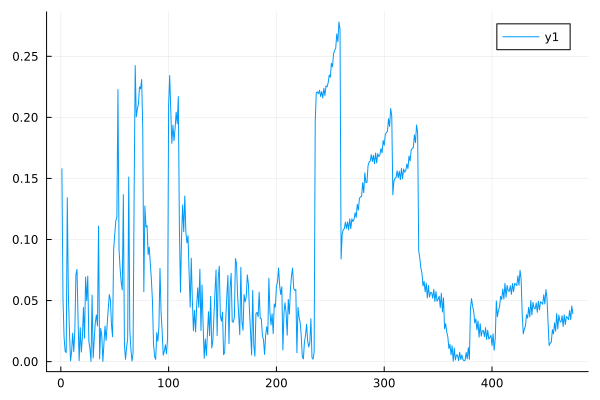

In [22]:
using Plots
plot(compa1)

In [23]:
chi2_carlos = cls_carlos["chi2_nolp"]
chi2_carlos2 = cls_carlos2["chi2_nolp"]
chi2_carlos3 = cls_carlos3["chi2_nolp"]
chi2_carlos4 = cls_carlos4["chi2_nolp"]
println(chi2_carlos)
println(chi2_carlos2)
println(chi2_carlos3)
println(chi2_carlos4)

495.62231927779936
495.00947244084654
495.89420547809317
497.2051355000593


In [24]:
chi2_jaime1 = dot((cls_jaime1 .- data_vector), inv_cov_tot  * (cls_jaime1 .- data_vector))
println(chi2_jaime1)

564.4237811372612


In [25]:
chi2_jaime2 = dot((cls_jaime2 .- data_vector), inv_cov_tot  * (cls_jaime2 .- data_vector))
println(chi2_jaime2)

571.5648149541164


In [26]:
(chi2_jaime1-chi2_carlos4)/chi2_carlos4

0.13519298341437563

# Turing model

In [17]:
@model function model(data_vector;
                      tracers_names=tracers_names,
                      pairs=pairs,
                      pairs_id=pairs_ids,
                      idx=idx,
                      cov_tot=cov_tot, 
                      files=files)
    
    #DESY1 priors
    Ωm ~ Uniform(0.1, 0.6)
    Ωb = 0.05 #~ Uniform(0.03, 0.045)
    h  = 0.67 #~ Uniform(0.60, 0.91)
    ns = 0.96 #~ Uniform(0.87, 1.07)
    s8 = 0.811 #~ Uniform(0.6, 0.9)
    
    cosmology = LimberJack.Cosmology(Ωm, Ωb, h, ns, s8,
                                     tk_mode="EisHu",
                                     Pk_mode="Halofit")
    
    theory = Theory(cosmology, tracers_names, pairs,
                    pairs_ids, idx, files)
    data_vector ~ MvNormal(theory, cov_tot)
end;

In [18]:
iterations = 300
nadapts = 100;

In [19]:
chain3 = sample(model(data_vector), NUTS(5, 0.1; init_ϵ=0.03), iterations,
                progress=true; save_state=true);

LoadError: UndefRefError: access to undefined reference

In [40]:
chain1 = sample(model(data_vector), MH(), iterations,
            nadapt=nadapts, progress=true; save_state=true);

Sampling: 100%|█████████████████████████████████████████| Time: 0:01:03


1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365
1365


LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mangularCℓs[22m[0m[1m([22m[90mcosmo[39m::[0mCosmology, [90mt1[39m::[0mNumberCountsTracer, [90mt2[39m::[0mWeakLensingTracer, [90mℓs[39m::[0mVector[90m{Float64}[39m[0m[1m)[22m
    [90m   @ [39m[35mLimberJack[39m [90m~/PhD/LimberJack.jl/src/[39m[90m[4mspectra.jl:30[24m[39m
     [2] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/PhD/LimberJack.jl/src/[39m[90m[4mtheory.jl:67[24m[39m[90m [inlined][39m
     [3] [0m[1m(::LimberJack.var"#23#threadsfor_fun#17"{Cosmology, Dict{String, Array}, Vector{Float64}, Vector{Int64}, Vector{Any}, Vector{SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}, Vector{SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[35mLimberJack[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [4] [0m[1m(::LimberJack.var"#23#threadsfor_fun#17"{Cosmology, Dict{String, Array}, Vector{Float64}, Vector{Int64}, Vector{Any}, Vector{SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}, Vector{SubArray{Int64, 1, Matrix{Int64}, Tuple{Int64, Base.Slice{Base.OneTo{Int64}}}, true}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[35mLimberJack[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m